## Import libraries

In [29]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

## Load Dataset

In [30]:
df=pd.read_csv(r'C:\Users\draj2\Downloads\AMZN_Stock_Updated_V2.csv')

## Dataset Check

In [31]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2000-01-03,4.075000,4.478125,3.952344,4.468750,322352000
1,1,2000-01-04,4.268750,4.575000,4.087500,4.096875,349748000
2,2,2000-01-05,3.525000,3.756250,3.400000,3.487500,769148000
3,3,2000-01-06,3.565625,3.634375,3.200000,3.278125,375040000
4,4,2000-01-07,3.350000,3.525000,3.309375,3.478125,210108000


## Drop Unknown Column

In [32]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

## Set Proper DateTime

In [9]:
df.set_index('Date',inplace = True)# Set the date to be the index

In [10]:
# resorting the data
df.index =  pd.to_datetime(df.index,format='%Y-%m-%d')

In [11]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,4.075000,4.478125,3.952344,4.468750,322352000
2000-01-04,4.268750,4.575000,4.087500,4.096875,349748000
2000-01-05,3.525000,3.756250,3.400000,3.487500,769148000
2000-01-06,3.565625,3.634375,3.200000,3.278125,375040000
2000-01-07,3.350000,3.525000,3.309375,3.478125,210108000


## Data Visualization Plots

Text(0.5, 1.0, 'Anazon Stock at all time')

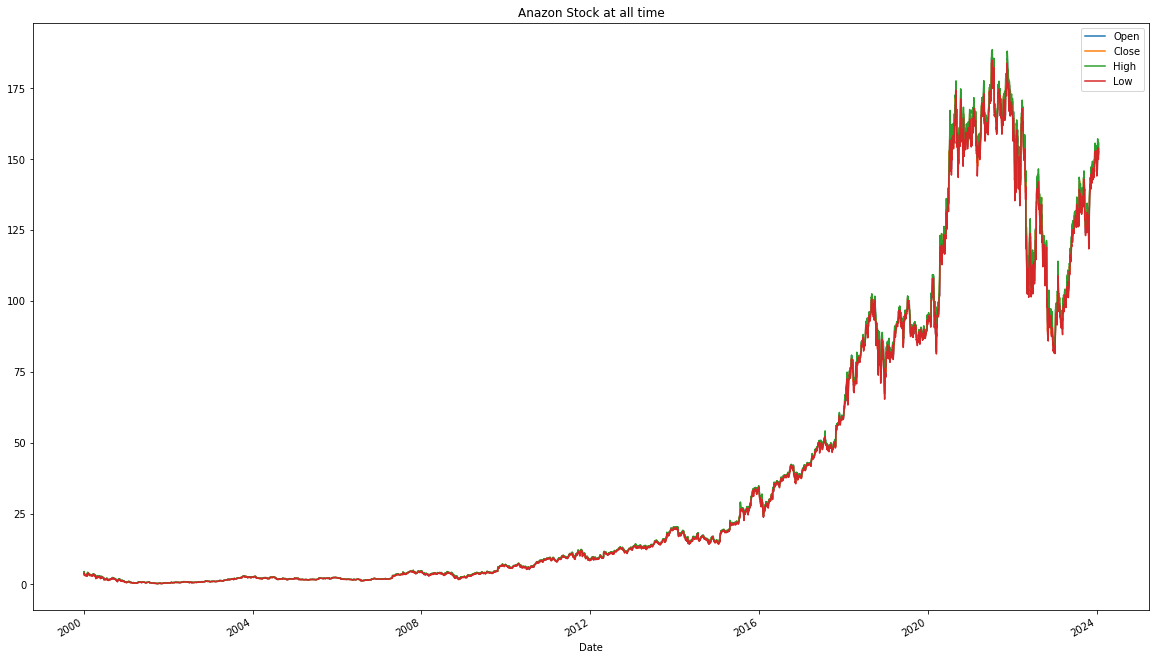

In [12]:
df[['Open','Close','High','Low']].plot(figsize = (20,12))
plt.title('Anazon Stock at all time')

Text(0, 0.5, 'Stock action')

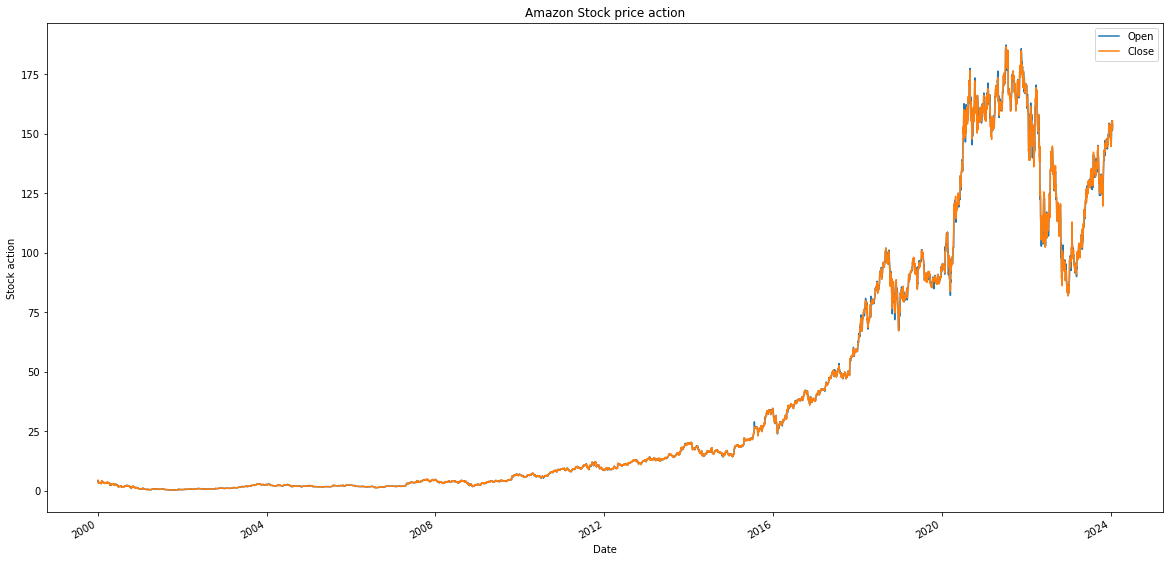

In [13]:
df[['Open','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

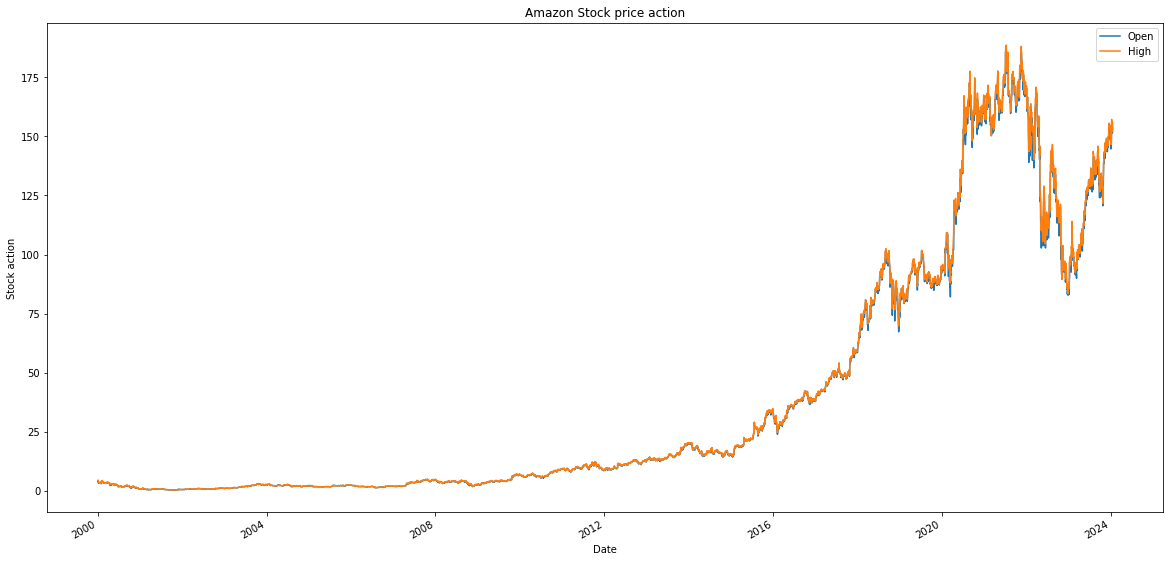

In [14]:
df[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

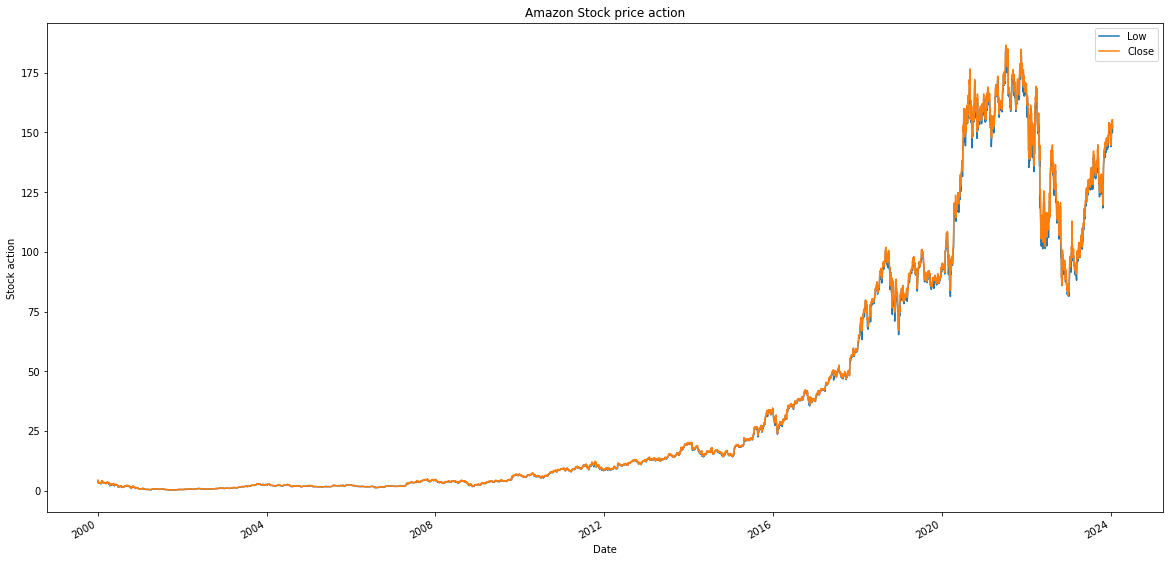

In [15]:
df[['Low','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

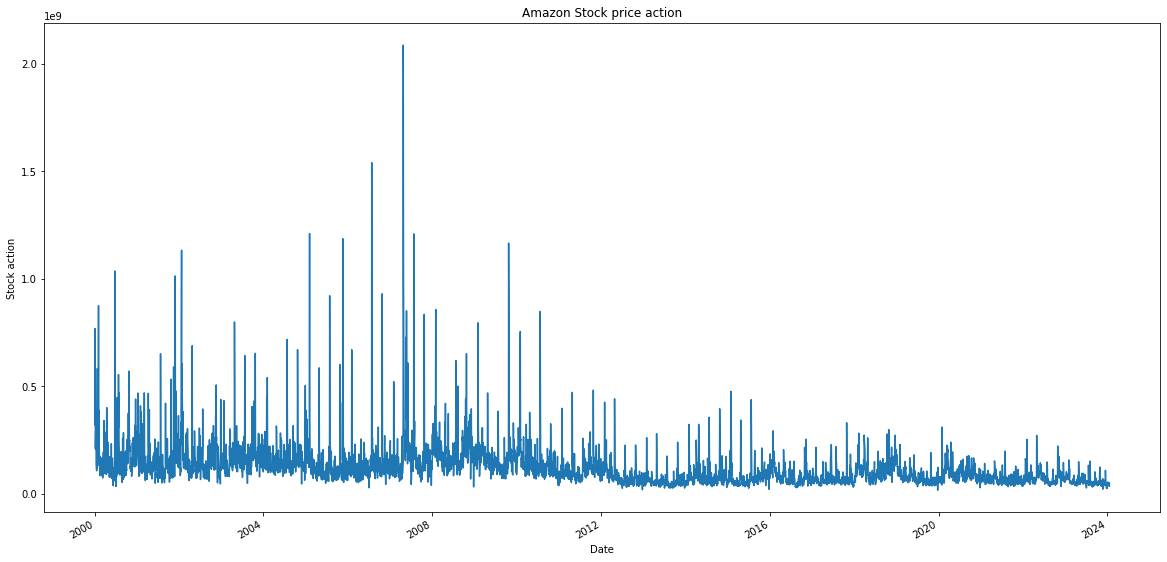

In [13]:
df['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

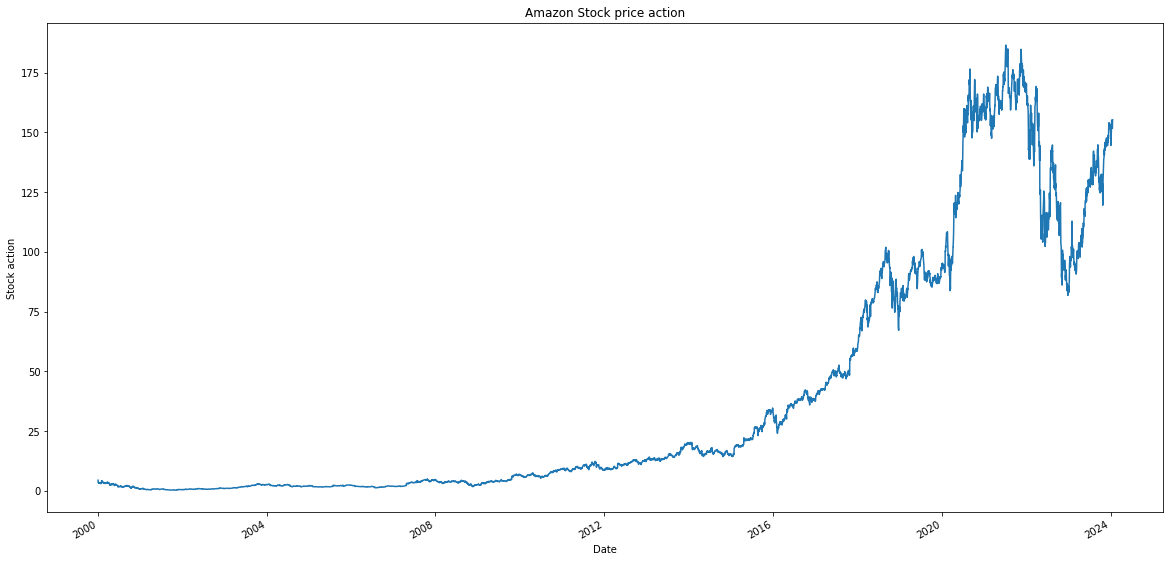

In [14]:
df['Close'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

## From the previous analysis and visualization, it can take data from 2000 as the previous years doesn't important, not have a stock price variance

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2024')

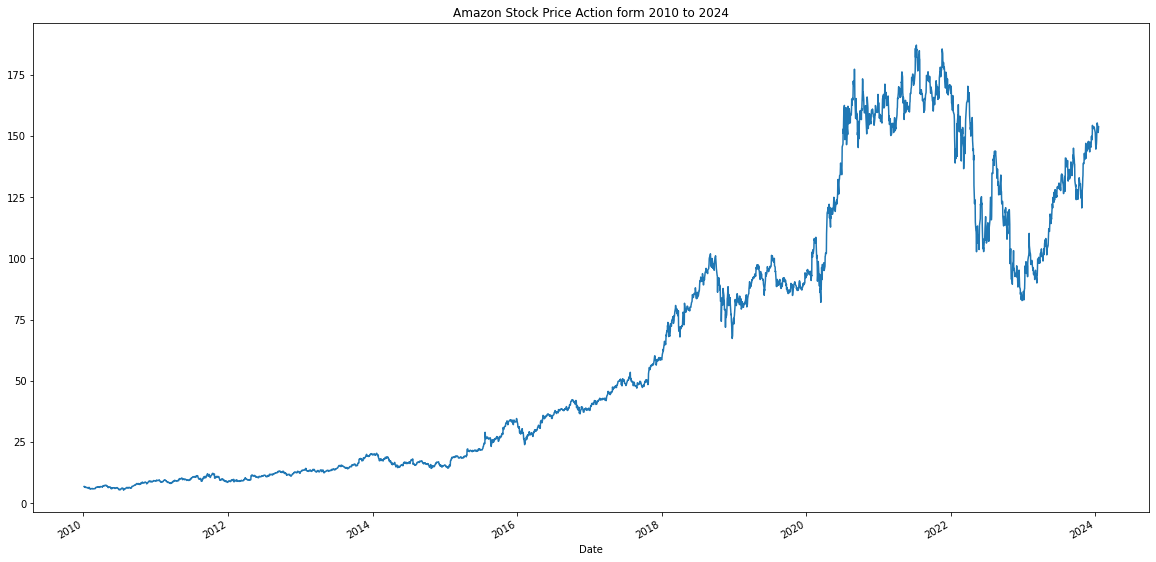

In [15]:
Ama = df['2010':'2024']


Ama['Open'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2024')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2024')

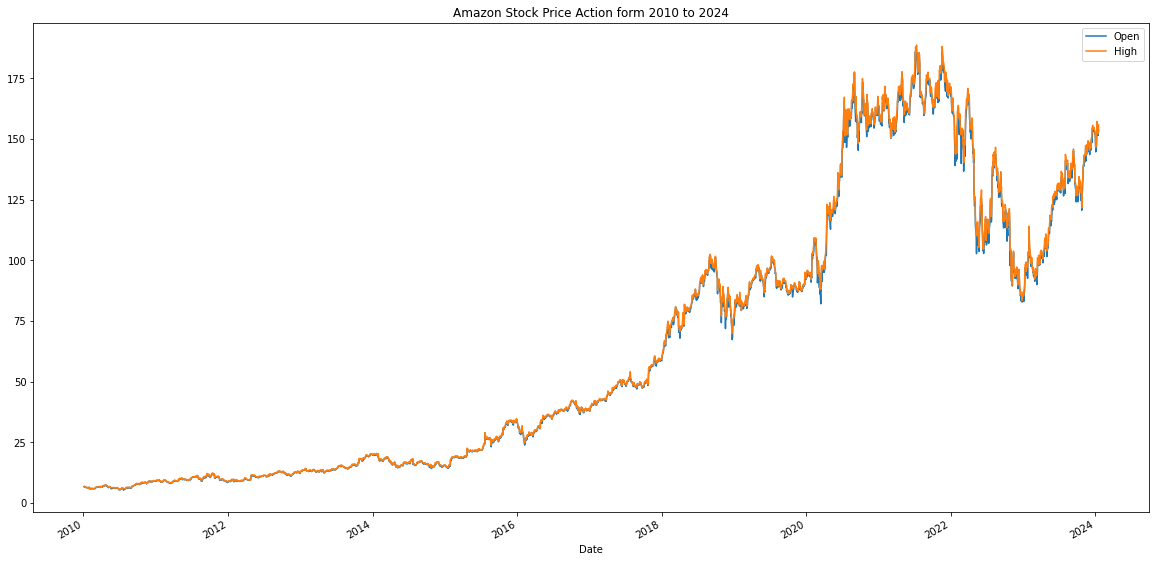

In [16]:
Ama[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2024')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2024')

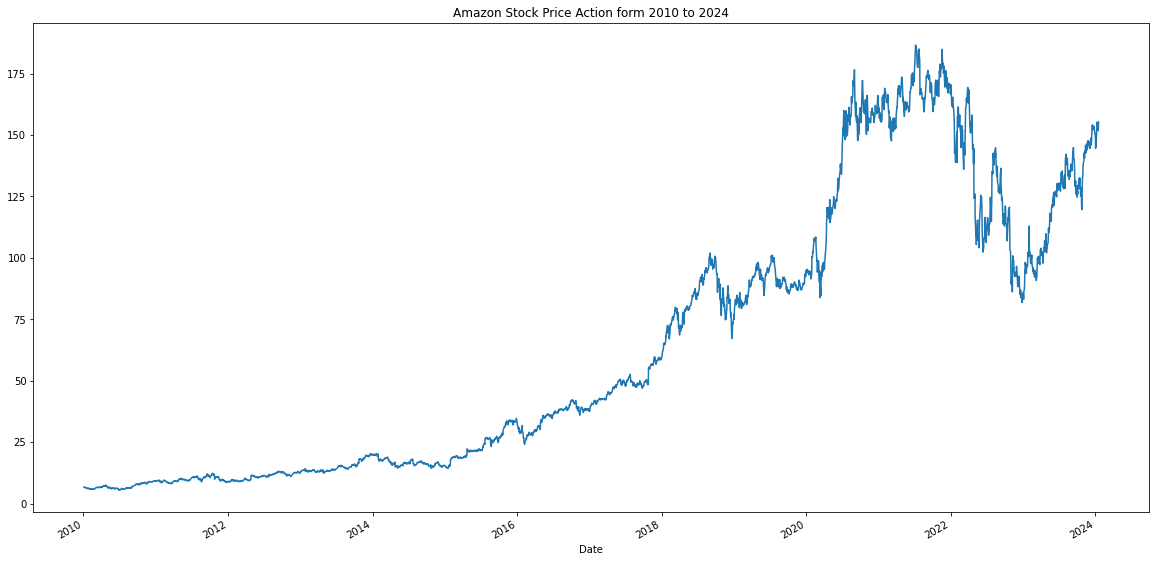

In [17]:
Ama['Close'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2024')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2024')

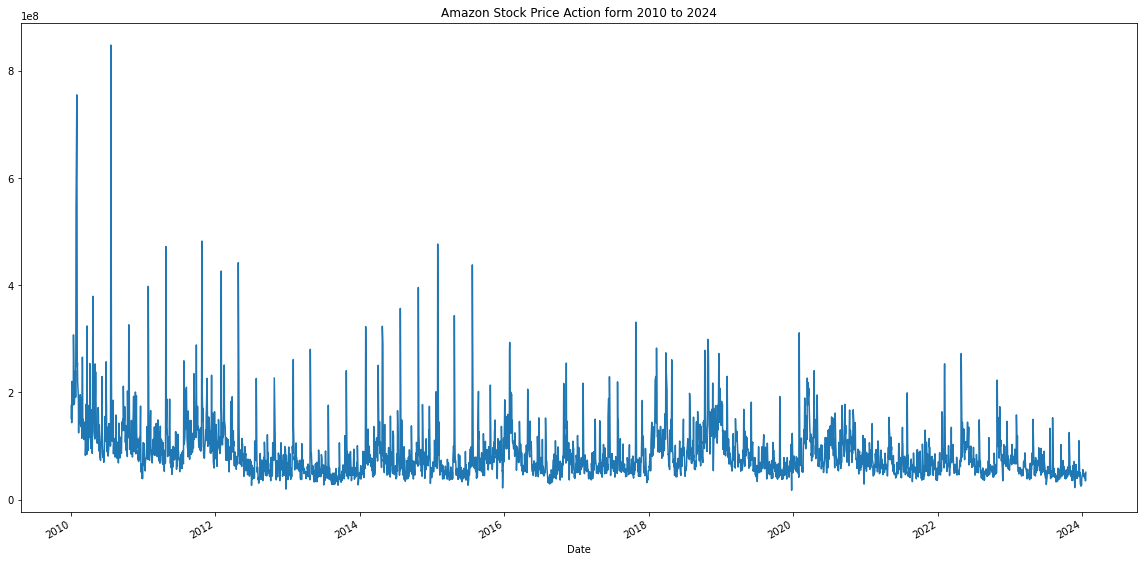

In [18]:
Ama['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2024')

In [19]:
Ama.describe()

,Open,High,Low,Close,Volume
count,3535.000000,3535.000000,3535.000000,3535.000000,3.535000e+03
mean,63.685713,64.426066,62.880988,63.669679,8.608715e+07
std,54.957900,55.617911,54.239931,54.924999,5.199366e+07
min,5.296500,5.564500,5.290000,5.430500,1.762600e+07
25%,14.206750,14.309000,14.064750,14.200500,5.454300e+07
50%,41.191002,41.507000,40.978001,41.147999,7.251800e+07
75%,100.406750,101.320999,99.010002,100.214001,1.008930e+08
max,187.199997,188.654007,184.839493,186.570496,8.484220e+08


## Data Preprocessing

In [31]:
train_Ama = Ama['High'].iloc[:-4]

# Take ramdom  6 variables 

X_train=[]
y_train=[]

for i in range(2, len(train_Ama)):
    X_train.append(train_Ama[i-2:i])
    y_train.append(train_Ama[i])

In [32]:
import math
train_len = math.ceil(len(train_Ama)*0.8)
train_len

2825

## For Model and apply RNN + LSTM

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [34]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Ama['Close'].values.reshape(-1,1))

In [35]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building the LSTM Model

In [36]:
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))



model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________


## Fit the model

In [37]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
111/111 - 3s - loss: 1669.5020
Epoch 2/10
111/111 - 1s - loss: 3.7485
Epoch 3/10
111/111 - 1s - loss: 3.6403
Epoch 4/10
111/111 - 1s - loss: 3.5878
Epoch 5/10
111/111 - 1s - loss: 3.6326
Epoch 6/10
111/111 - 1s - loss: 3.6245
Epoch 7/10
111/111 - 1s - loss: 3.6384
Epoch 8/10
111/111 - 1s - loss: 3.6800
Epoch 9/10
111/111 - 1s - loss: 3.6639
Epoch 10/10
111/111 - 1s - loss: 3.6316


<AxesSubplot:>

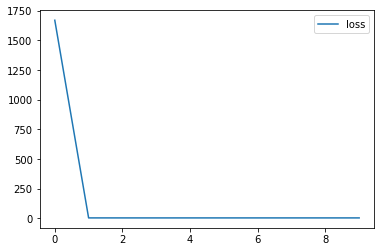

In [38]:
# Plotting the training loss
losses = pd.DataFrame(model.history.history)
losses[['loss']].plot()

In [39]:
test_data = train_Ama[train_len-2:]
X_val=[]
Y_val=[] 

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])

In [40]:
# Preparing the test data
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
prediction = model.predict(X_val)

## Making predictions

In [41]:
lstm_valid_pred = model.predict(X_val)

## Calculating RMSE

In [42]:
print('Validation RMSE:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Validation RMSE: 3.272718126250743


In [43]:
from sklearn.metrics import mean_squared_error
# Know the model error accuracy | the model accuracy 
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Train rmse: 1.8963054392538132
Validation rmse: 3.272718126250743


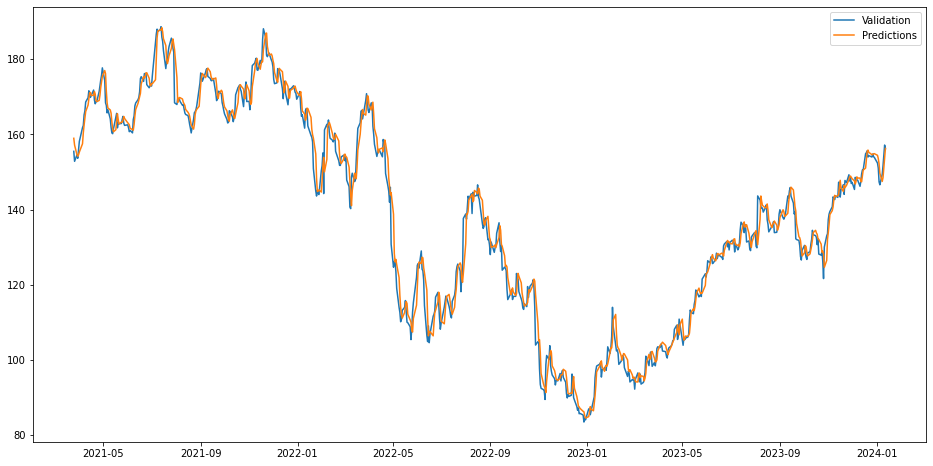

In [44]:
valid = pd.DataFrame(train_Ama[train_len:])
valid['Predictions']=lstm_valid_pred 
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

## Data Frame to see the percentage of error between real and predicted

In [45]:
variance = []
for i in range(len(valid)):
  
  variance.append(valid['High'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

,0
count,706.000000
mean,-0.508989
std,3.235188
min,-14.161652
25%,-2.260727
50%,-0.530453
75%,1.363928
max,14.635864


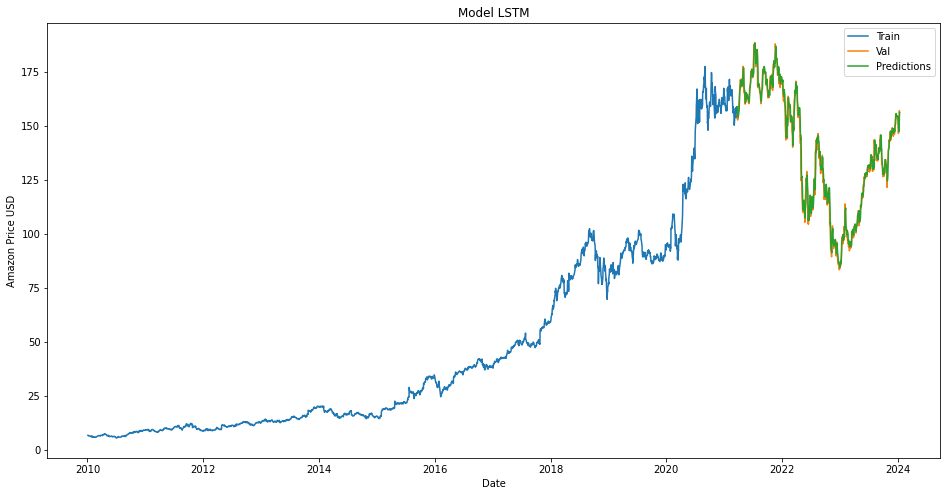

In [46]:
train = train_Ama[:train_len]
valid = pd.DataFrame(train_Ama[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Amazon Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()